In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Data/Datasets/flights.csv')
data.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [5]:
data.shape

(336776, 21)

In [6]:
data.index.to_series()

0              0
1              1
2              2
3              3
4              4
           ...  
336771    336771
336772    336772
336773    336773
336774    336774
336775    336775
Length: 336776, dtype: int64

In [7]:
(data.id == data.index.to_series()).all()

True

In [8]:
data.drop('id', axis=1, inplace=True)

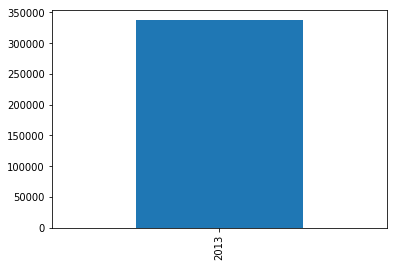

In [9]:
data.year.value_counts().plot.bar();

all flights occured in 2013

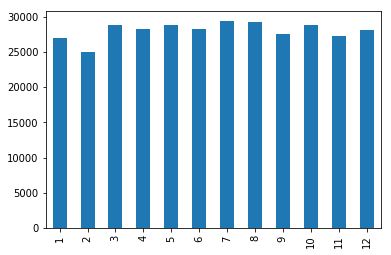

In [10]:
data.month.value_counts().sort_index().plot.bar();

nearly uniform distribution of flights in months

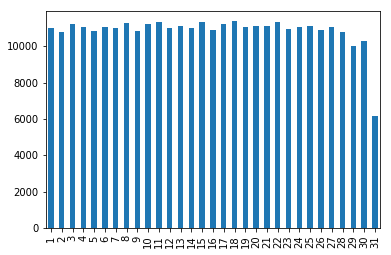

In [11]:
data.day.value_counts().sort_index().plot.bar();

nearly uniform distribution of flights in days

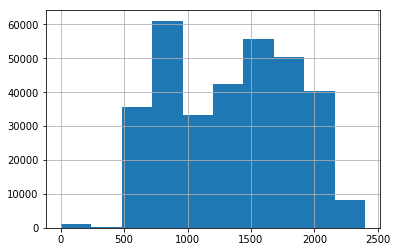

In [12]:
data.dep_time.hist()

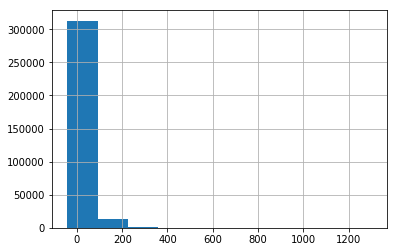

In [13]:
data.dep_delay.hist()

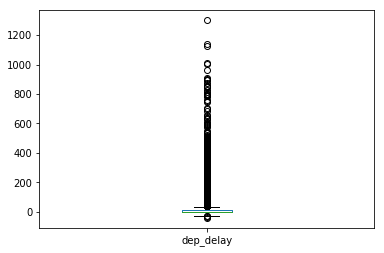

In [14]:
data.dep_delay.plot.box()

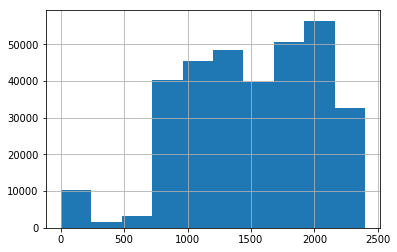

In [15]:
data.arr_time.hist()

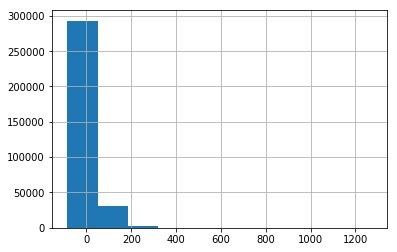

In [16]:
data.arr_delay.hist()

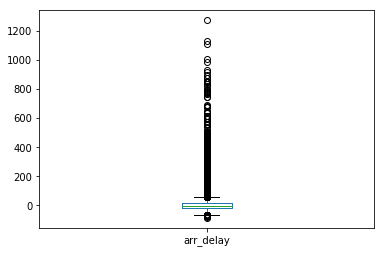

In [17]:
data.arr_delay.plot.box();

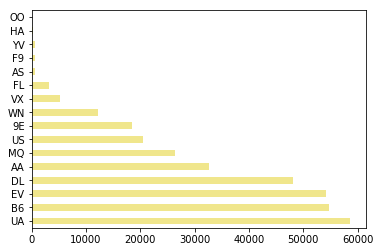

In [18]:
data.carrier.value_counts().plot.barh(color='khaki');

In [19]:
data.flight.nunique()

3844

In [20]:
data.flight.value_counts().iloc[:5]

15     968
27     898
181    882
301    871
161    786
Name: flight, dtype: int64

3844 flights in this dataset

In [21]:
data.tailnum.nunique()

4043

4043 aircrafts

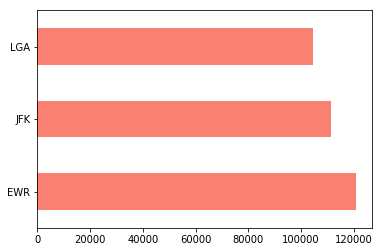

In [22]:
data.origin.value_counts().plot.barh(color='salmon');

3 airports of New York City

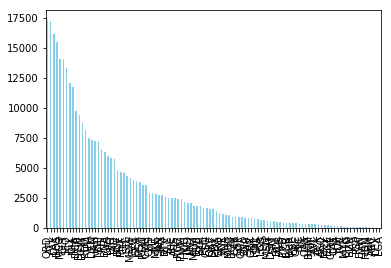

In [23]:
data.dest.value_counts().plot.bar(color='skyblue')

In [24]:
data.dest.nunique()

105

105 destinations of flights

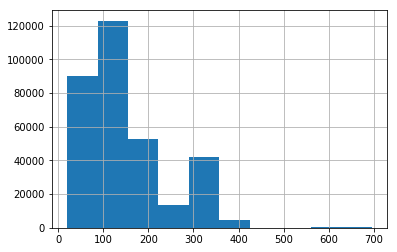

In [25]:
data.air_time.hist()

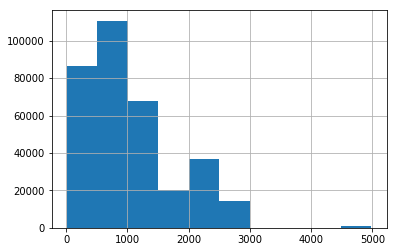

In [26]:
data.distance.hist()

In [27]:
data.hour.dtype

dtype('int64')

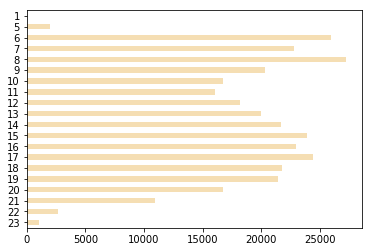

In [28]:
data.hour.value_counts().sort_index(ascending=False).plot.barh(color='wheat')

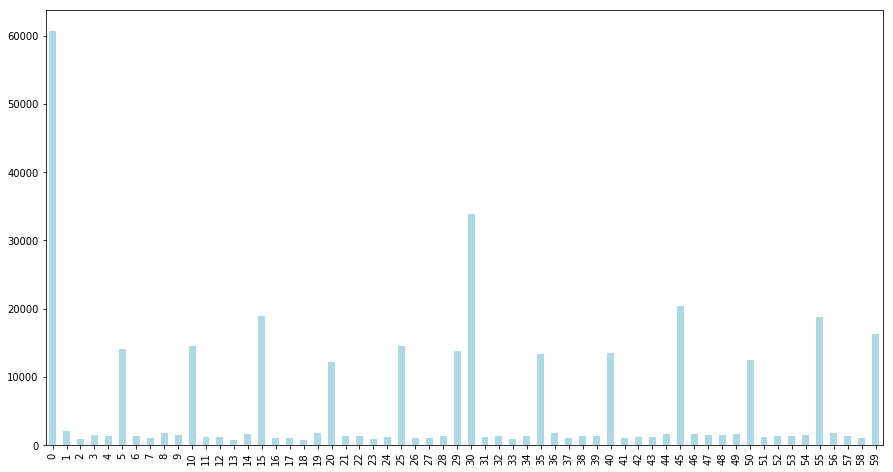

In [29]:
plt.figure(figsize=(15, 8))
data.minute.value_counts().sort_index().plot.bar(color='lightblue');

In [30]:
data.time_hour.max()

'2013-12-31 23:00:00'

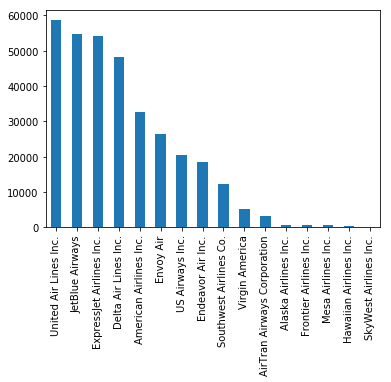

In [31]:
data.name.value_counts().plot.bar();

In [32]:
((data.sched_dep_time // 100) == data.hour).all()

True

In [33]:
(data.sched_dep_time % 100  == data.minute).all()

True

sched_dep_time is result of string concatenation of hour and minute in time_hour feature

In [34]:
data.loc[0][['sched_dep_time', 'dep_delay', 'air_time', 'sched_arr_time',
             'arr_delay', 'dep_time', 'air_time', 'arr_time']]

sched_dep_time    515
dep_delay           2
air_time          227
sched_arr_time    819
arr_delay          11
dep_time          517
air_time          227
arr_time          830
Name: 0, dtype: object

In [35]:
divmod(227, 60)

(3, 47)

In [36]:
data.loc[1][['sched_dep_time', 'dep_delay', 'air_time', 'sched_arr_time',
             'arr_delay', 'dep_time', 'air_time', 'arr_time']]

sched_dep_time    529
dep_delay           4
air_time          227
sched_arr_time    830
arr_delay          20
dep_time          533
air_time          227
arr_time          850
Name: 1, dtype: object

In [37]:
data.loc[2][['sched_dep_time', 'dep_delay', 'air_time', 'sched_arr_time',
             'arr_delay', 'dep_time', 'air_time', 'arr_time']]

sched_dep_time    540
dep_delay           2
air_time          160
sched_arr_time    850
arr_delay          33
dep_time          542
air_time          160
arr_time          923
Name: 2, dtype: object

In [38]:
data.loc[3][['sched_dep_time', 'dep_delay', 'air_time', 'sched_arr_time',
             'arr_delay', 'dep_time', 'air_time', 'arr_time']]

sched_dep_time     545
dep_delay           -1
air_time           183
sched_arr_time    1022
arr_delay          -18
dep_time           544
air_time           183
arr_time          1004
Name: 3, dtype: object

In [39]:
data.air_time.between(61, 100).sum()

54000

In [40]:
data.air_time.between(161, 200).sum()

30439

In [41]:
data.dep_delay.between(61, 100).sum()

13235

In [42]:
data.dep_delay.between(161, 200).sum()

2453

In [43]:
data.arr_delay.between(61, 100).sum()

13902

air time and delay times features is in minutes  
but other times are hour + minute of a specific time

In [44]:
data[['distance', 'air_time']].corr()

,distance,air_time
distance,1.00000,0.99065
air_time,0.99065,1.00000


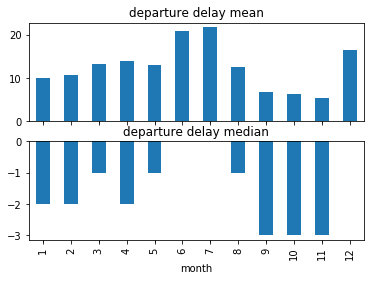

In [45]:
fig, ax = plt.subplots(2, 1, sharex=True)
data.groupby(['month'])['dep_delay'].mean().plot.bar(ax=ax[0], title='departure delay mean');
data.groupby('month')['dep_delay'].median().plot.bar(ax=ax[1], title='departure delay median');

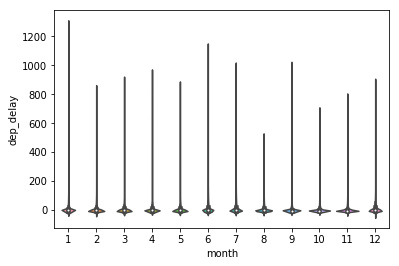

In [46]:
import seaborn as sns
width, height = 15, 20
# sns.set(rc = {'figure.figsize':(width,height)})
sns.violinplot(data=data, x='month', y='dep_delay');

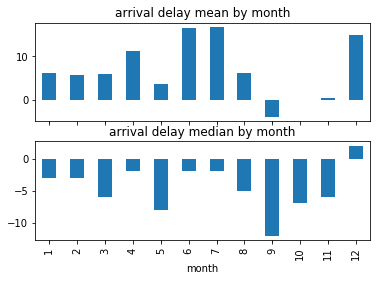

In [47]:
fig, ax = plt.subplots(2, 1, sharex=True)
data.groupby('month')['arr_delay'].mean().plot.bar(ax=ax[0], title='arrival delay mean by month');
data.groupby('month')['arr_delay'].median().plot.bar(ax=ax[1], title='arrival delay median by month');

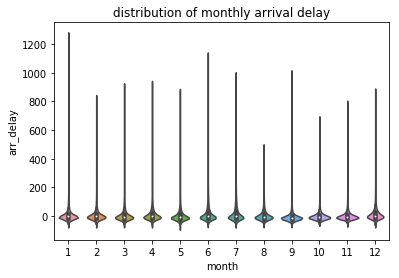

In [48]:
sns.violinplot(data=data, x='month', y='arr_delay', ).set_title('distribution of monthly arrival delay');

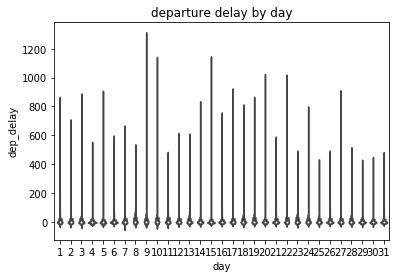

In [49]:
sns.violinplot(data=data, x='day', y='dep_delay').set_title('departure delay by day');

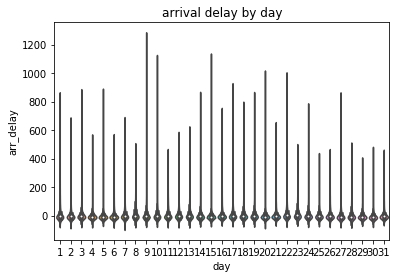

In [50]:
sns.violinplot(data=data, x='day', y='arr_delay').set_title('arrival delay by day');

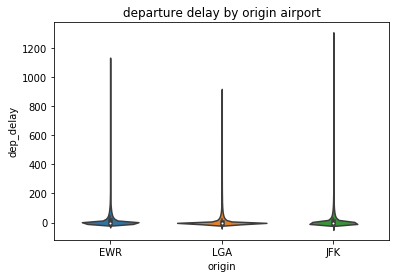

In [51]:
sns.violinplot(data=data, x='origin', y='dep_delay').set_title('departure delay by origin airport');

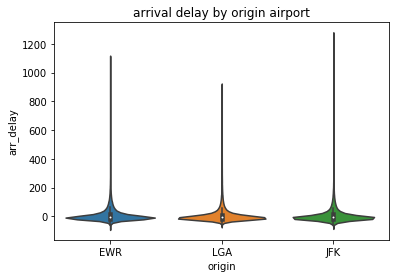

In [52]:
sns.violinplot(data=data, x='origin', y='arr_delay').set_title('arrival delay by origin airport');

In [53]:
flights_by_airport = data.groupby('origin')
airport_lga = flights_by_airport.get_group('LGA')
airport_jfk = flights_by_airport.get_group('JFK')
airport_ewr = flights_by_airport.get_group('EWR')

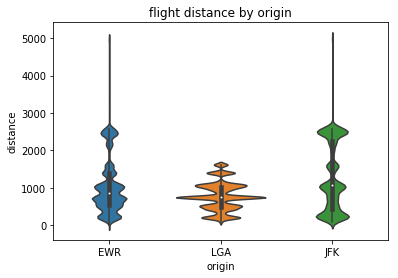

In [54]:
sns.violinplot(data=data, x='origin', y='distance').set_title('flight distance by origin');

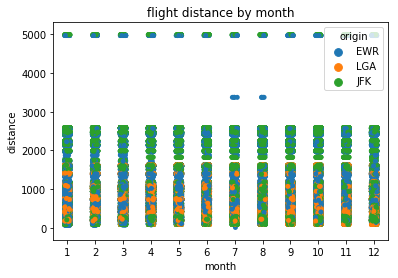

In [55]:
sns.stripplot(data=data, x='month', y='distance', hue='origin').set_title('flight distance by month');

In [56]:
print(f'number of destinations from EWR: {airport_ewr.dest.nunique()}')
print(f'number of destinations from JFK: {airport_jfk.dest.nunique()}')
print(f'number of destinations from LGA: {airport_lga.dest.nunique()}')
print(f'number of all destinations: {data.dest.nunique()}')

number of destinations from EWR: 86
number of destinations from JFK: 70
number of destinations from LGA: 68
number of all destinations: 105


In [57]:
ewr_dests = airport_ewr.dest.unique()
jfk_dests = airport_jfk.dest.unique()
lga_dests = airport_lga.dest.unique()

In [58]:
print('intersect of jfk and lga:')
np.intersect1d(lga_dests, jfk_dests)

intersect of jfk and lga:


array(['ATL', 'BHM', 'BNA', 'BOS', 'BTV', 'BUF', 'BWI', 'CHS', 'CLE',
       'CLT', 'CMH', 'CVG', 'DCA', 'DEN', 'DFW', 'DTW', 'FLL', 'HOU',
       'IAD', 'IAH', 'IND', 'JAX', 'MCI', 'MCO', 'MEM', 'MIA', 'MKE',
       'MSP', 'MSY', 'ORD', 'ORF', 'PBI', 'PHL', 'PIT', 'PWM', 'RDU',
       'RIC', 'ROC', 'RSW', 'SDF', 'SRQ', 'STL', 'SYR', 'TPA'],
      dtype=object)

In [59]:
print('intersect of jfk and ewr:')
np.intersect1d(jfk_dests, ewr_dests)

intersect of jfk and ewr:


array(['ATL', 'AUS', 'BNA', 'BOS', 'BQN', 'BTV', 'BUF', 'BWI', 'CHS',
       'CLE', 'CLT', 'CMH', 'CVG', 'DCA', 'DEN', 'DFW', 'DTW', 'EGE',
       'FLL', 'HNL', 'HOU', 'IAD', 'IAH', 'IND', 'JAC', 'JAX', 'LAS',
       'LAX', 'MCI', 'MCO', 'MEM', 'MIA', 'MKE', 'MSP', 'MSY', 'ORD',
       'ORF', 'PBI', 'PDX', 'PHL', 'PHX', 'PIT', 'PWM', 'RDU', 'RIC',
       'ROC', 'RSW', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJU', 'SLC',
       'STL', 'STT', 'SYR', 'TPA'], dtype=object)

In [60]:
print('intersect of lga and ewr:')
np.intersect1d(lga_dests, ewr_dests)

intersect of lga and ewr:


array(['ATL', 'AVL', 'BNA', 'BOS', 'BTV', 'BUF', 'BWI', 'CAE', 'CHS',
       'CLE', 'CLT', 'CMH', 'CVG', 'DAY', 'DCA', 'DEN', 'DFW', 'DSM',
       'DTW', 'FLL', 'GRR', 'GSO', 'GSP', 'HOU', 'IAD', 'IAH', 'IND',
       'JAX', 'MCI', 'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSN',
       'MSP', 'MSY', 'MYR', 'OMA', 'ORD', 'ORF', 'PBI', 'PHL', 'PIT',
       'PWM', 'RDU', 'RIC', 'ROC', 'RSW', 'SAV', 'SBN', 'SDF', 'STL',
       'SYR', 'TPA', 'TVC', 'TYS', 'XNA'], dtype=object)

In [61]:
print('intersect of all origins:')
np.intersect1d(np.intersect1d(jfk_dests, ewr_dests), lga_dests)

intersect of all origins:


array(['ATL', 'BNA', 'BOS', 'BTV', 'BUF', 'BWI', 'CHS', 'CLE', 'CLT',
       'CMH', 'CVG', 'DCA', 'DEN', 'DFW', 'DTW', 'FLL', 'HOU', 'IAD',
       'IAH', 'IND', 'JAX', 'MCI', 'MCO', 'MEM', 'MIA', 'MKE', 'MSP',
       'MSY', 'ORD', 'ORF', 'PBI', 'PHL', 'PIT', 'PWM', 'RDU', 'RIC',
       'ROC', 'RSW', 'SDF', 'STL', 'SYR', 'TPA'], dtype=object)

In [69]:
! pip install matplotlib_venn

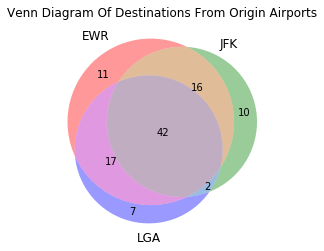

In [63]:
from matplotlib_venn import venn3
ewr_dests_set = set(ewr_dests)
jfk_dests_set = set(jfk_dests)
lga_dests_set = set(lga_dests)
venn3([ewr_dests_set, jfk_dests_set, lga_dests_set],
      ['EWR', 'JFK', 'LGA'])
plt.title('Venn Diagram Of Destinations From Origin Airports')
plt.show()

In [64]:
print('Dests Only From EWR:')
specific_dest_ewr = np.setdiff1d(ewr_dests, np.union1d(jfk_dests, lga_dests))
specific_dest_ewr

Dests Only From EWR:


array(['ALB', 'ANC', 'BDL', 'BZN', 'HDN', 'LGA', 'MTJ', 'OKC', 'PVD',
       'SNA', 'TUL'], dtype=object)

In [65]:
print('Dests Only From JFK:')
specific_dest_jfk = np.setdiff1d(jfk_dests, np.union1d(ewr_dests, lga_dests))
specific_dest_jfk

Dests Only From JFK:


array(['ABQ', 'ACK', 'BUR', 'LGB', 'MVY', 'OAK', 'PSE', 'PSP', 'SJC',
       'SMF'], dtype=object)

In [66]:
print('Dests Only From LGA')
specific_dest_lga = np.setdiff1d(lga_dests, np.union1d(jfk_dests, ewr_dests))
specific_dest_lga

Dests Only From LGA


array(['BGR', 'CAK', 'CHO', 'CRW', 'EYW', 'ILM', 'LEX'], dtype=object)

In [67]:
print(f'number of flights from EWR: {airport_ewr.shape[0]}')
print(f'number of flights from JFK: {airport_jfk.shape[0]}')
print(f'number of flights from LGA: {airport_lga.shape[0]}')


number of flights from EWR: 120835
number of flights from JFK: 111279
number of flights from LGA: 104662


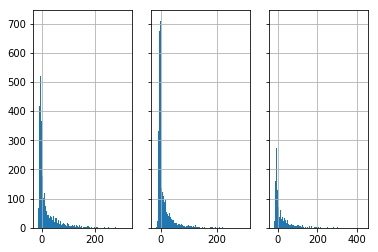

In [68]:
fig, ax = plt.subplots(1, 3, sharey=True)
data[data.dest.isin(specific_dest_ewr)].dep_delay.hist(bins=100, ax=ax[0],);
data[data.dest.isin(specific_dest_jfk)].dep_delay.hist(bins=100, ax=ax[1]);
data[data.dest.isin(specific_dest_lga)].dep_delay.hist(bins=100, ax=ax[2]);

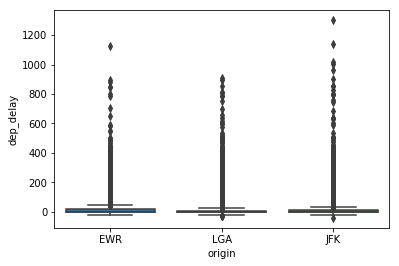

In [71]:
sns.boxplot(data=data, x='origin', y='dep_delay');

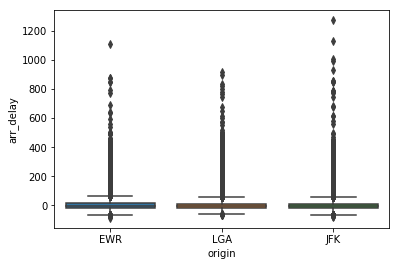

In [72]:
sns.boxplot(data=data, x='origin', y='arr_delay');

In [73]:
data.groupby('origin')['dep_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
EWR,117596.0,15.107954,41.323704,-25.0,-4.0,-1.0,15.0,1126.0
JFK,109416.0,12.112159,39.035071,-43.0,-5.0,-1.0,10.0,1301.0
LGA,101509.0,10.346876,39.993021,-33.0,-6.0,-3.0,7.0,911.0


In [74]:
data.groupby('origin')['arr_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
EWR,117127.0,9.107055,45.529183,-86.0,-16.0,-4.0,16.0,1109.0
JFK,109079.0,5.551481,44.277448,-79.0,-18.0,-6.0,13.0,1272.0
LGA,101140.0,5.783488,43.862273,-68.0,-17.0,-5.0,12.0,915.0


In [76]:
data.isna().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [78]:
np.logical_and(data.air_time.isna(), data.arr_delay.isna()).sum()

9430

In [79]:
np.logical_and(data.dep_delay.isna(), data.dep_time.isna()).sum()

8255

In [80]:
np.logical_and(data.dep_delay.isna(), data.arr_time.isna()).sum()

8255

In [83]:
np.logical_and(data.dep_delay.notna(), data.arr_time.isna()).sum()

458

In [84]:
data.loc[np.logical_and(data.dep_delay.notna(), data.arr_time.isna())]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
754,2013,1,1,2016.0,1930,46.0,NaN,2220,NaN,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,2013-01-01 19:00:00,ExpressJet Airlines Inc.
1714,2013,1,2,2041.0,2045,-4.0,NaN,2359,NaN,B6,147,N630JB,JFK,RSW,NaN,1074,20,45,2013-01-02 20:00:00,JetBlue Airways
1756,2013,1,2,2145.0,2129,16.0,NaN,33,NaN,UA,1299,N12221,EWR,RSW,NaN,1068,21,29,2013-01-02 21:00:00,United Air Lines Inc.
7039,2013,1,9,615.0,615,0.0,NaN,855,NaN,9E,3856,N161PQ,JFK,ATL,NaN,760,6,15,2013-01-09 06:00:00,Endeavor Air Inc.
7851,2013,1,9,2042.0,2040,2.0,NaN,2357,NaN,B6,677,N807JB,JFK,LAX,NaN,2475,20,40,2013-01-09 20:00:00,JetBlue Airways
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328710,2013,9,22,1244.0,1215,29.0,NaN,1405,NaN,MQ,3616,N501MQ,LGA,MSP,NaN,1020,12,15,2013-09-22 12:00:00,Envoy Air
330305,2013,9,24,623.0,625,-2.0,NaN,800,NaN,MQ,3525,N735MQ,LGA,RDU,NaN,431,6,25,2013-09-24 06:00:00,Envoy Air
330418,2013,9,24,800.0,800,0.0,NaN,933,NaN,UA,544,N827UA,LGA,ORD,NaN,733,8,0,2013-09-24 08:00:00,United Air Lines Inc.
334177,2013,9,27,2253.0,1945,188.0,NaN,2146,NaN,EV,5306,N605QX,LGA,GSO,NaN,461,19,45,2013-09-27 19:00:00,ExpressJet Airlines Inc.


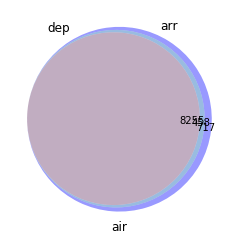

In [87]:
dep_time_nans = set(data[data.dep_time.isna()].index)
arr_time_nans = set(data[data.arr_time.isna()].index)
air_time_nans = set(data[data.air_time.isna()].index)
venn3([dep_time_nans, arr_time_nans, air_time_nans], ['dep', 'arr', 'air'])

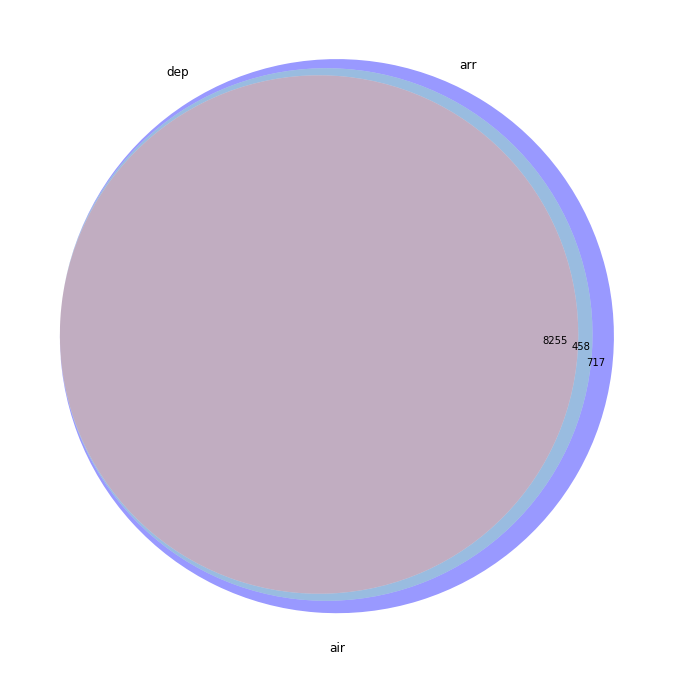

In [90]:
plt.figure(figsize=(12, 12))
venn3([dep_time_nans, arr_time_nans, air_time_nans], ['dep', 'arr', 'air']);

In [5]:
data.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


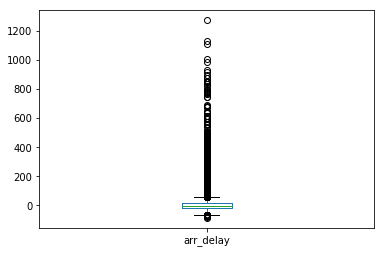

In [6]:
data.arr_delay.plot.box();

In [7]:
data.arr_delay.describe()

count    327346.000000
mean          6.895377
std          44.633292
min         -86.000000
25%         -17.000000
50%          -5.000000
75%          14.000000
max        1272.000000
Name: arr_delay, dtype: float64

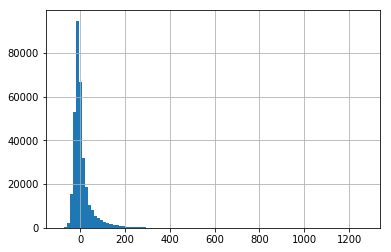

In [8]:
data.arr_delay.hist(bins=100);

In [10]:
data.arr_delay.mean() + 3 * data.arr_delay.std()

140.79525182790067

In [11]:
data['arr_delay'][data.arr_delay < 141].describe()

count    320061.000000
mean          2.361594
std          31.321344
min         -86.000000
25%         -17.000000
50%          -5.000000
75%          12.000000
max         140.000000
Name: arr_delay, dtype: float64

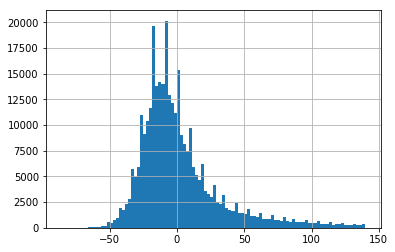

In [12]:
data['arr_delay'][data.arr_delay < 141].hist(bins=100);

In [13]:
data['arr_delay'][data.arr_delay < 141].skew()

1.6737402327802957

In [14]:
data['arr_delay'][data.arr_delay < 141].kurtosis()

3.3853469493231736

In [15]:
from scipy.stats import trim_mean
trim_mean(data.arr_delay, 0.1)

0.9612355338465307

In [18]:
trim_mean(data.arr_delay, 0.05)

4.607476080501485

In [21]:
for i in np.arange(0, 0.5, 0.05):
    print(trim_mean(data.arr_delay, i))

nan
4.607476080501485
0.9612355338465307
-0.9537888557078865
-2.1064850098482673
-2.8439496876261967
-3.343154284696241
-3.6676564324880734
-3.8849545697487975
-3.999821842152147


In [22]:
trim_mean(data.arr_delay, 0.49)

-4.0820961995249405

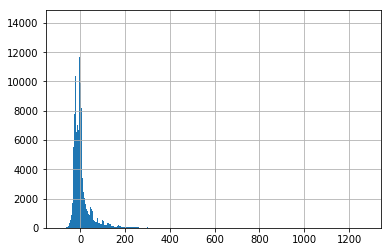

In [25]:
data.arr_delay.hist(bins=1000)

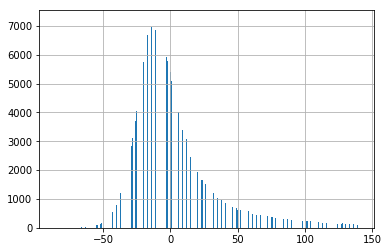

In [26]:
data['arr_delay'][data.arr_delay < 141].hist(bins=1000)

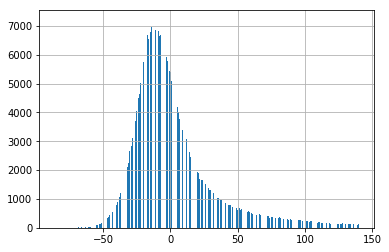

In [27]:
data['arr_delay'][data.arr_delay < 141].hist(bins=500)

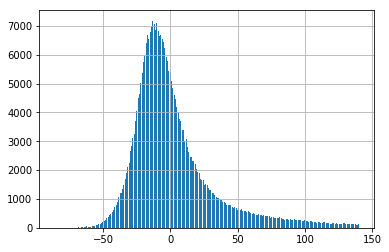

In [28]:
data['arr_delay'][data.arr_delay < 141].hist(bins=300)

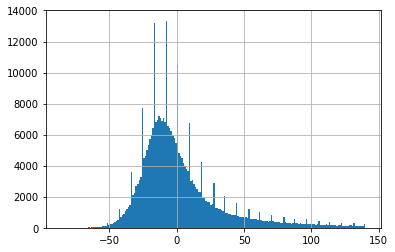

In [29]:
data['arr_delay'][data.arr_delay < 141].hist(bins=200)

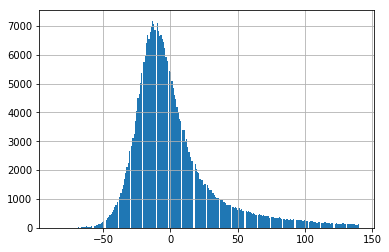

In [30]:
data['arr_delay'][data.arr_delay < 141].hist(bins=250)

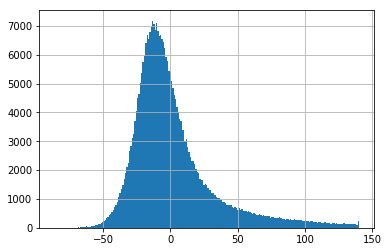

In [31]:
data['arr_delay'][data.arr_delay < 141].hist(bins=225)

In [32]:
from scipy import stats
stats.normaltest(data['arr_delay'][data.arr_delay < 141])

NormaltestResult(statistic=101631.5660075848, pvalue=0.0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x76817e85c7f0>,
      dtype=object)

<Figure size 1080x1080 with 0 Axes>

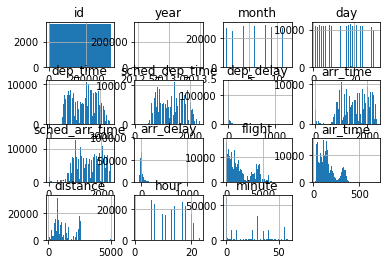

In [34]:
plt.figure(figsize=(15, 15))
data.hist(bins=100)

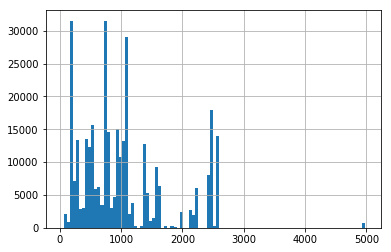

In [35]:
data.distance.hist(bins=100)

bins: 100


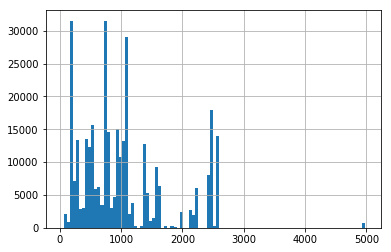

bins: 150


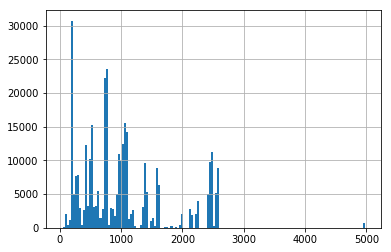

bins: 200


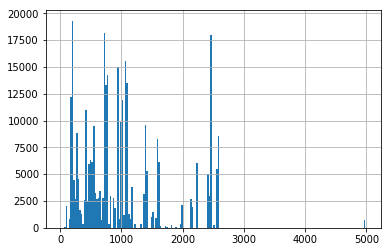

bins: 250


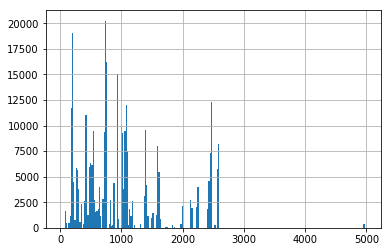

bins: 300


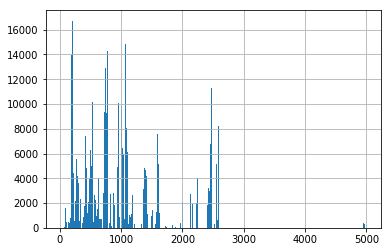

bins: 350


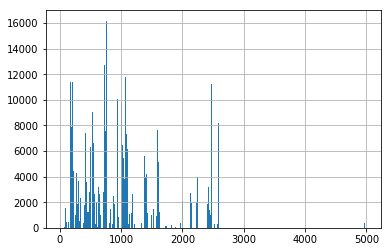

bins: 400


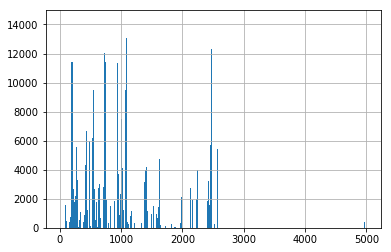

bins: 450


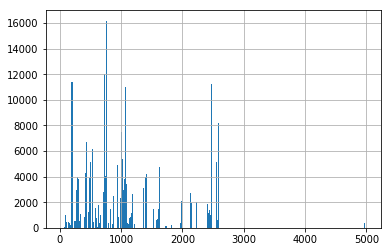

bins: 500


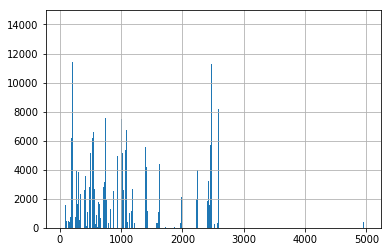

bins: 550


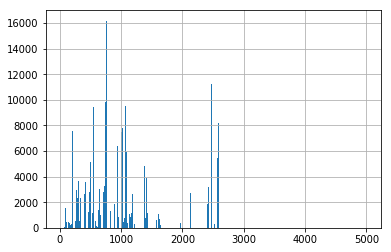

bins: 600


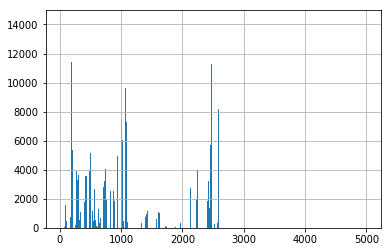

bins: 650


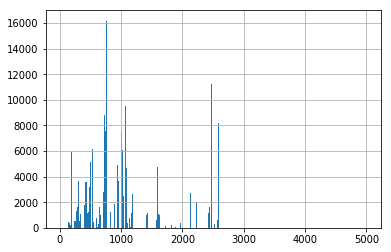

bins: 700


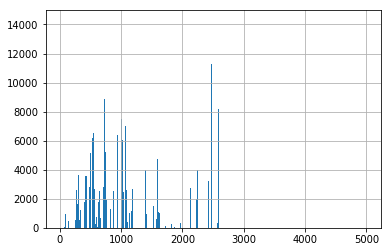

bins: 750


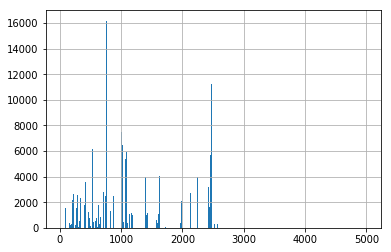

bins: 800


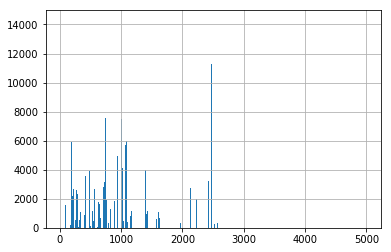

bins: 850


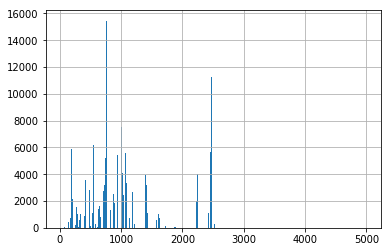

bins: 900


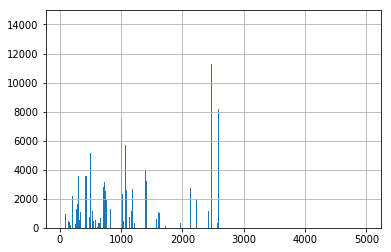

bins: 950


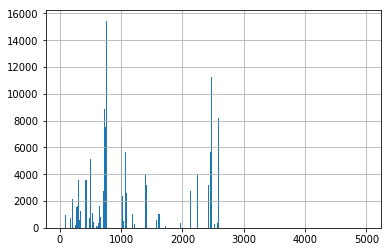

bins: 1000


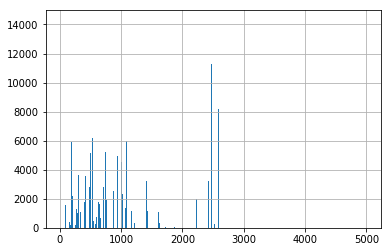

In [39]:
for i in range(100, 1001, 50):
    print(f'bins: {i}')
    data.distance.hist(bins=i,)
    plt.show()

In [40]:
stats.normaltest(data.distance)

NormaltestResult(statistic=55860.930783148746, pvalue=0.0)

In [41]:
stats.normaltest(data.arr_delay)

NormaltestResult(statistic=nan, pvalue=nan)

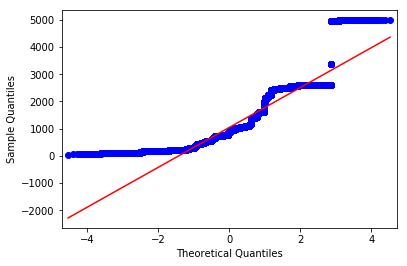

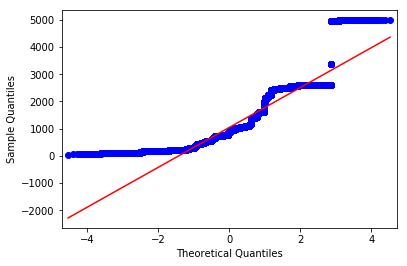

In [43]:
from statsmodels.graphics.gofplots import qqplot

qqplot(data.distance, line='s')

In [15]:
arrival_delay_without_nan = data.arr_delay.dropna()

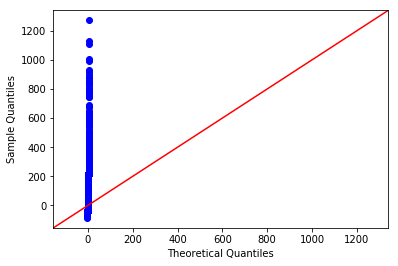

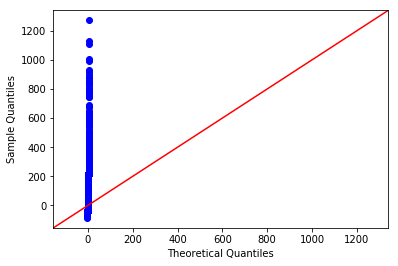

In [16]:
qqplot(arrival_delay_without_nan, line='45')

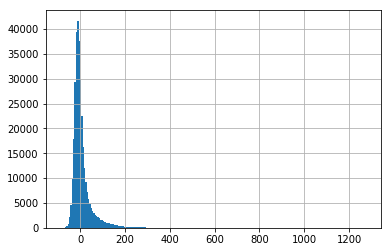

In [17]:
arrival_delay_without_nan.hist(bins=225)

In [48]:
from scipy.stats import shapiro

In [49]:
shapiro(data.arr_delay)

/home/ali/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

In [50]:
shapiro(arrival_delay_without_nan)

/home/ali/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7008342742919922, pvalue=0.0)

In [53]:
stats.anderson(data.arr_delay)

AndersonResult(statistic=nan, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [51]:
arrival_delay_without_nan

0         11.0
1         20.0
2         33.0
3        -18.0
4        -25.0
          ... 
336765   -17.0
336766   -20.0
336767   -16.0
336768     1.0
336769   -25.0
Name: arr_delay, Length: 327346, dtype: float64

In [52]:
len(data)

336776

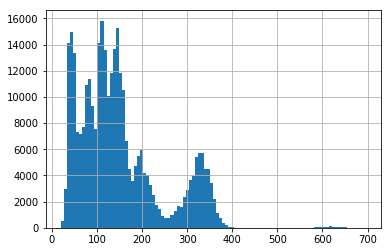

In [54]:
data.air_time.hist(bins=100)

bins: 100


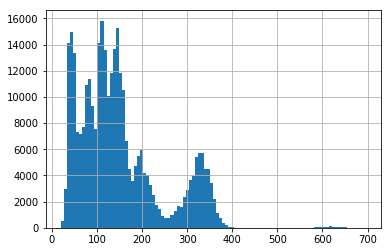

bins: 150


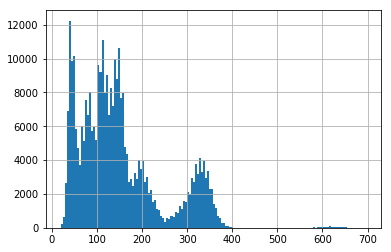

bins: 200


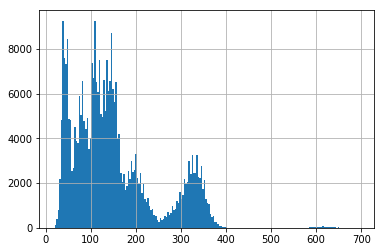

bins: 250


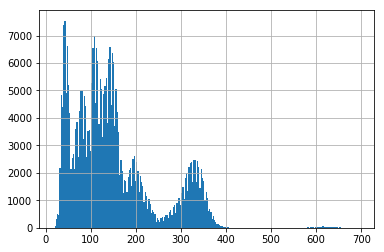

bins: 300


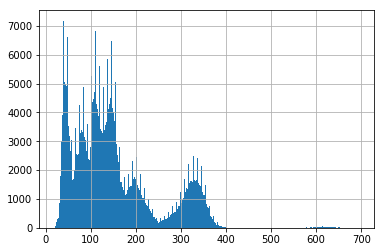

bins: 350


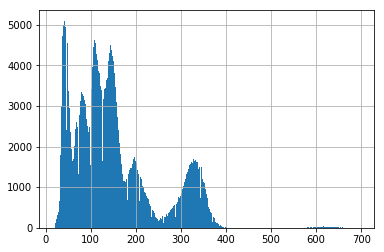

bins: 400


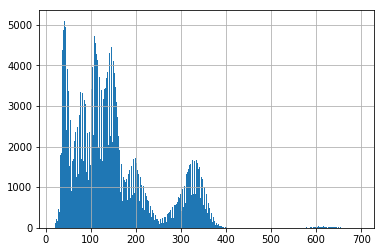

bins: 450


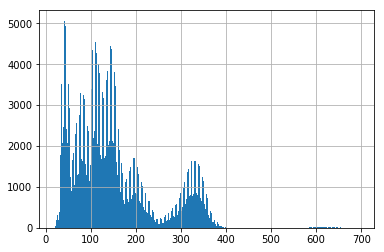

bins: 500


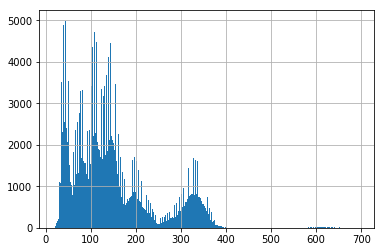

bins: 550


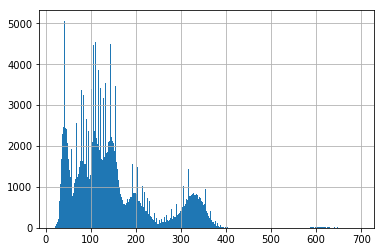

bins: 600


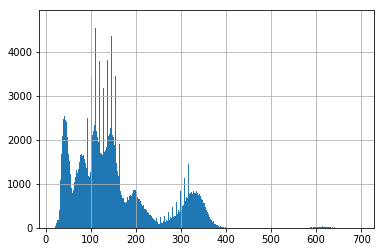

bins: 650


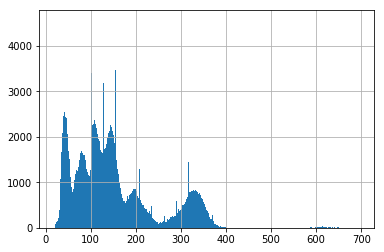

bins: 700


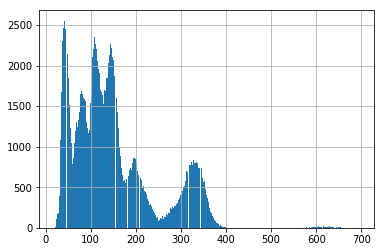

bins: 750


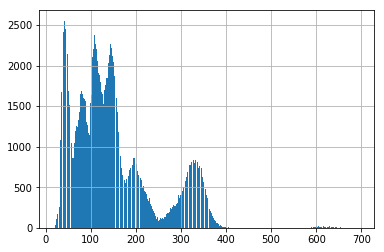

bins: 800


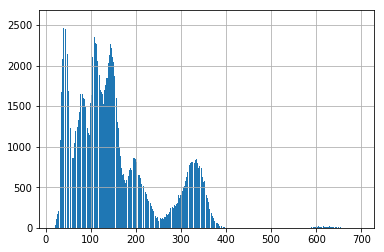

bins: 850


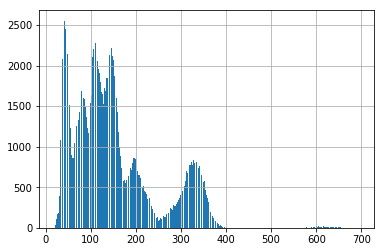

bins: 900


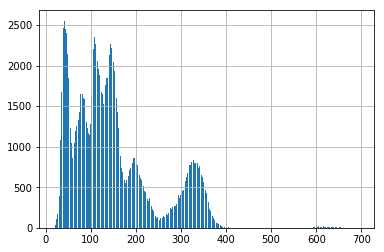

bins: 950


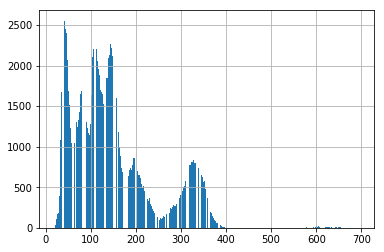

bins: 1000


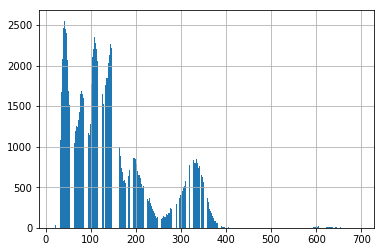

In [6]:
for i in range(100, 1001, 50):
    print(f'bins: {i}')
    data.air_time.hist(bins=i)
    plt.show()

In [9]:
from scipy.stats import shapiro
shapiro(data.air_time)

/home/ali/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

In [10]:
from scipy.stats import normaltest
normaltest(data.air_time)

NormaltestResult(statistic=nan, pvalue=nan)

In [11]:
normaltest(data.air_time.dropna())

NormaltestResult(statistic=47975.81547930506, pvalue=0.0)

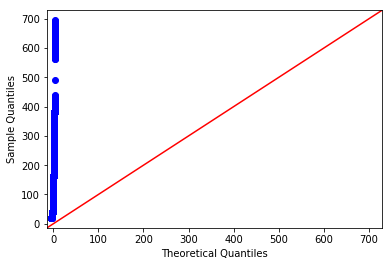

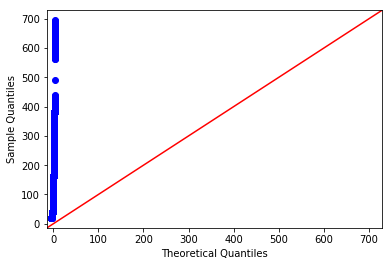

In [14]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data.air_time.dropna(), line='45')